<a href="https://colab.research.google.com/github/ShyamKrishna122/FODS_CASE_STUDY/blob/main/FODS_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Fundamentals of Data Science Case Study:** 
*Dataset Used: Uber Rides Dataset*

Exploring data is certainly one of the most important stages on Data Science process. Despite its simplicity, it could be a powerful tool to put you ahead on data and business context, as well as to determine crutial treatments before creating machine learning models.

##**Data Preprocessing**

Importing libraries and dataset.

In [ ]:
# Libraries for handling numeric computation and dataframes
import pandas as pd
import numpy as np

# Libraries for statistical plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

# My personal data storaged in my Github repository
rides = pd.read_csv('https://raw.githubusercontent.com/ShyamKrishna122/FODS_CASE_STUDY/main/trips_data.csv')

Checking basic dataset information (data types and dimensions)

In [ ]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  554 non-null    int64  
 1   Product Type          551 non-null    object 
 2   Trip or Order Status  554 non-null    object 
 3   Request Time          554 non-null    object 
 4   Begin Trip Time       554 non-null    object 
 5   Begin Trip Lat        525 non-null    float64
 6   Begin Trip Lng        525 non-null    float64
 7   Dropoff Time          554 non-null    object 
 8   Dropoff Lat           525 non-null    float64
 9   Dropoff Lng           525 non-null    float64
 10  Distance (miles)      554 non-null    float64
 11  Fare Amount           554 non-null    float64
 12  Fare Currency         551 non-null    object 
dtypes: float64(6), int64(1), object(6)
memory usage: 56.4+ KB


***.rename( )*** method allows you to rename axis labels (indexes and columns). 


In [ ]:
rides.rename(columns={'Trip or Order Status': 'status', 'Request Time': 'request_time','Product Type':'product_type','Begin Trip Time':'begin_time',
                      'Begin Trip Lat':'begin_lat','Begin Trip Lng':'begin_lng','Dropoff Time':'dropoff_time','Dropoff Lat':'dropoff_lat',
                      'Dropoff Lng':'dropoff_lng','Distance (miles)':'distance_miles','Fare Amount':'fare_amount',
                      'Fare Currency':'fare_currency','City':'city'}, inplace=True)

In [ ]:
rides.head()

,city,product_type,status,request_time,begin_time,begin_lat,begin_lng,dropoff_time,dropoff_lat,dropoff_lng,distance_miles,fare_amount,fare_currency
0,458,Black,COMPLETED,2021-01-13 22:06:46 +0000 UTC,2021-01-13 22:11:10 +0000 UTC,-23.599752,-46.715954,2021-01-13 22:29:13 +0000 UTC,-23.559359,-46.666542,4.84,29.63,BRL
1,458,VIP,COMPLETED,2021-01-13 20:21:05 +0000 UTC,2021-01-13 20:27:29 +0000 UTC,-23.559298,-46.666454,2021-01-13 20:54:50 +0000 UTC,-23.599585,-46.715717,5.31,20.86,BRL
2,458,VIP,COMPLETED,2021-01-03 00:23:22 +0000 UTC,2021-01-03 00:33:00 +0000 UTC,-23.626593,-46.659410,2021-01-03 00:50:56 +0000 UTC,-23.559273,-46.666595,5.90,34.23,BRL
3,458,VIP,COMPLETED,2020-12-11 23:16:33 +0000 UTC,2020-12-11 23:27:32 +0000 UTC,-23.559410,-46.666435,2020-12-12 00:32:47 +0000 UTC,-23.425755,-46.481190,19.74,58.77,BRL
4,458,VIP,COMPLETED,2020-12-11 00:35:46 +0000 UTC,2020-12-11 00:46:46 +0000 UTC,-23.584846,-46.663590,2020-12-11 00:57:57 +0000 UTC,-23.559261,-46.666510,2.54,12.63,BRL


In [ ]:
rides.describe()

,city,begin_lat,begin_lng,dropoff_lat,dropoff_lng,distance_miles,fare_amount,distance_km,amount_km,request_lead_time,trip_duration
count,541.000000,515.000000,515.000000,515.000000,515.000000,541.000000,541.000000,541.000000,444.000000,444.000000,5.410000e+02
mean,470.223660,-23.560418,-46.621857,-23.567195,-46.614912,4.106377,15.861848,6.608595,3.114707,4.893243,-3.308136e+05
std,112.597447,0.069760,0.243102,0.070950,0.243722,3.772027,11.532966,6.070524,2.507516,2.961041,2.893255e+06
min,296.000000,-23.975843,-46.837136,-23.975839,-46.837120,0.000000,0.000000,0.000000,0.000000,0.500000,-2.634835e+07
25%,458.000000,-23.602638,-46.666396,-23.611168,-46.666382,1.190000,7.880000,1.920000,2.207500,3.000000,5.800000e+00
50%,458.000000,-23.559439,-46.644786,-23.568158,-46.637291,3.450000,14.510000,5.550000,2.630000,4.300000,1.580000e+01
75%,458.000000,-23.503629,-46.624973,-23.504681,-46.618351,6.030000,24.390000,9.700000,3.712500,6.125000,2.600000e+01
max,1449.000000,-22.903051,-43.105089,-22.902098,-43.114359,19.740000,58.770000,31.770000,46.960000,26.600000,9.180000e+01


Taking a look on the **continuous variables**, we notice the presence of some outliers. However **these outliers do not seem to reflect any abnormal value** (e.g. fare_amount = 1000 BRL), which may let us a little bit more comfortable.

*In case abnormal values are found, some treatment should be probably considered (e.g. outliers replacement/removal).*

In [ ]:
df2 = rides[rides.product_type!='UberEATS Marketplace']
a = df2['fare_amount'].tolist()
q1 = np.quantile(a,0.25)
q3 = np.quantile(a,0.75)

med = np.median(a)

iqr = q3-q1

print("IQR:",iqr)

u_b = q3+(1.5*iqr)
l_b = q1-(1.5*iqr)

print("Lower_Bound:",l_b)

print("Upper_Bound:",u_b)


for i in a:
  if(i<=l_b or i>=u_b):
    print("Outliers:",i)

IQR: 16.465000000000003
Lower_Bound: -16.847500000000004
Upper_Bound: 49.0125
Outliers: 58.77
Outliers: 51.01


                count  mean   std  min  25%   50%   75%   max
distance_miles  554.0   4.0   3.8  0.0  1.2   3.3   6.0  19.7
fare_amount     554.0  16.3  12.4  0.0  7.9  15.1  24.7  95.4


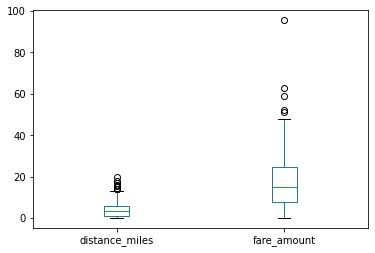

In [ ]:
df1 = rides[['distance_miles','fare_amount']]

print(df1.describe().transpose().round(1));
df1.boxplot(grid=False);

Not surprisingly we have a **strong correlation** between 'fare_amount' and 'distance_miles', inferring that **as much you stay on the ride, higher will the fare be**.

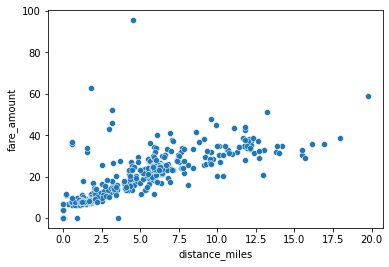

In [ ]:
sns.scatterplot(x='distance_miles',y='fare_amount',data=df1);

##**1) Data Preparation**

Remove the column **fare_currency**, since all the trips happened inside a single country (Brazil), all entry has fare_currency = 'BRL'

In [ ]:
rides.pop('fare_currency');

Now let's check existance of ***missing values***.

In [ ]:
rides.isnull().sum().sort_values(ascending=False)

dropoff_lng       29
dropoff_lat       29
begin_lng         29
begin_lat         29
product_type       3
fare_amount        0
distance_miles     0
dropoff_time       0
begin_time         0
request_time       0
status             0
city               0
dtype: int64

There were found 3 records without ```product_type```.
As shown below, these records are insignificant to my dataset, since practically no columns are fulfilled.

In [ ]:
rides[rides.product_type.isnull()]

,city,product_type,status,request_time,begin_time,begin_lat,begin_lng,dropoff_time,dropoff_lat,dropoff_lng,distance_miles,fare_amount
281,458,NaN,UNFULFILLED,2018-05-26 18:36:51 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,0.0,0.0
362,1449,NaN,UNFULFILLED,2018-02-13 01:59:25 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,0.0,0.0
392,1449,NaN,UNFULFILLED,2018-01-01 04:44:10 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,0.0,0.0


So now, remove these 3 records before proceding.

In [ ]:
rides.dropna(subset = ['product_type'], inplace=True)

##**1.1 Data Cleansing**: Categorical features

While analysing the first categorical column **```<product_type>```**, we could clearly see that some work was necessary, since we could find different values referring to the same category. Then, we **summarized 15 original categories in 5 ones**.

In [ ]:
# Checking categories in product_type column
print(rides.product_type.value_counts())

# Categories reclassification
product_mapping = {'UberX':'UberX','uberX':'UberX','uberX VIP':'UberX','VIP':'UberX','POOL':'Pool','POOL: MATCHED':'Pool','UberBLACK': 'Black',
                   'uberx':'UberX','uberPOOL':'Pool','uberPOOL: MATCHED':'Pool','Pool: MATCHED':'Pool'}

rides['product_type'].replace(product_mapping, inplace=True)

print(rides.product_type.value_counts())

UberX                   169
uberX                   144
uberX VIP                81
VIP                      71
POOL                     36
Pool                     12
UberEATS Marketplace     10
POOL: MATCHED             8
uberPOOL: MATCHED         5
uberPOOL                  5
Pool: MATCHED             4
Black                     3
Juntos                    1
UberBLACK                 1
uberx                     1
Name: product_type, dtype: int64
UberX                   466
Pool                     70
UberEATS Marketplace     10
Black                     4
Juntos                    1
Name: product_type, dtype: int64


As the scope of this analysis is only around Uber rides, we removed ***UberEATS*** records from my dataset. 

In [ ]:
rides = rides[rides.product_type!='UberEATS Marketplace']

Our second categorical feature ```<status>``` seems well classified in 3 status, which will not require any kind of treatment.

In [ ]:
rides.status.value_counts()

COMPLETED          444
CANCELED            87
DRIVER_CANCELED     10
Name: status, dtype: int64

##**1.2 Data Transformation:** Handling dates

**Dates** usually increase a lot your power of analysis, since you can break it down to different parts and generate insights from different perspectives. As previously shown, our dates features are in fact **object data types**, so we need to **convert them into datetime format**.

In [ ]:
# Library for manipulating dates and times
from datetime import datetime
from datetime import timedelta

# Function to convert features to datetime
def date_convertion(df, cols):

  for col in cols:
    df[col] = df[col].apply(lambda x: x.replace(' +0000 UTC', ''))
    df[col] = pd.to_datetime(df[col])
    
  return df

# Applying date_convertion function to date features 
rides = date_convertion(rides, ['request_time', 'begin_time', 'dropoff_time'])

In [ ]:
rides['year'] = rides.request_time.map(lambda x: datetime.strftime(x,"%Y"))
rides['month'] = rides.request_time.map(lambda x: datetime.strftime(x,"%b"))
rides['weekday'] = rides.request_time.map(lambda x: datetime.strftime(x,"%a"))
rides['time'] = rides.request_time.map(lambda x: datetime.strftime(x,"%H:%M"))

##**1.3 Feature Creation:** Creating new features

Based on ```<fare_amount>``` and ```<distance_miles>``` features we've created a new feature called ```<amount_km>```, which would help us understand **how much is payed by kilometer traveled**.

In [ ]:
rides['distance_km'] = round(rides.distance_miles*1.60934,2)
rides['amount_km'] = round(rides.fare_amount/rides.distance_km,2)

Delta time between ```<request_time>``` and ```<begin_time>``` will let us now **how much time (in minutes) I usually waited for Uber cars to arrive at my destination**. In this case, it was calculated in a minutes base.

In [ ]:
rides['request_lead_time'] = rides.begin_time - rides.request_time
rides['request_lead_time'] = rides['request_lead_time'].apply(lambda x: round(x.total_seconds()/60,1))

Similarly, delta time between ```<dropoff_time>``` and ```<begin_time>``` will let us now **how much time (in minutes) was spent on each trip**.

In [ ]:
rides['trip_duration'] = rides.dropoff_time - rides.begin_time
rides['trip_duration'] = rides['trip_duration'].apply(lambda x: round(x.total_seconds()/60,1))

As features in records with **Canceled** and **Driver_Cancelled status** will not be useful for my analysis, set them as **null values** to clean up.

In [ ]:
rides.loc[(rides.status == 'CANCELED') | (rides.status == 'DRIVER_CANCELED'),'request_lead_time']=np.nan
rides.loc[(rides.status == 'CANCELED') | (rides.status == 'DRIVER_CANCELED'),'amount_km']=np.nan
rides.loc[(rides.status == 'CANCELED') | (rides.status == 'DRIVER_CANCELED'),['begin_time','dropoff_time']]= np.nan

##**Data Analysis & Visulization:**

In [ ]:
completed_rides = rides[(rides.status!='CANCELED')&(rides.status!='DRIVER_CANCELED')] 

###**How many trips I did over the years?**

A total of **444 trips** were completed from Apr'16 to Jan'21. If we disconsider 2016 and 2021 (not full years), we can clearly see that from **2017 to 2019 the average rides per year is 124**, and that there is a **huge drop from 2019 to 2020 (-51%)**. This is easily explained by the COVID outbreak.

*Now, imagine if we extrapolate this result to all Uber users...*

Total trips:  444
2016     17
2017    120
2018    146
2019    106
2020     52
2021      3
Name: year, dtype: int64


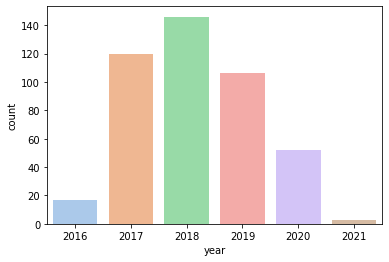

In [ ]:
print('Total trips: ', completed_rides.status.count())
print(completed_rides.year.value_counts().sort_index(ascending=True))
sns.countplot(data=completed_rides, x='year',order=['2016','2017','2018','2019','2020','2021'], palette='pastel');

###**How many trips were completed or canceled?**



Looking at the stacked bars below, we can see that **excluding 2015 and 2021**, 2020 has the highest cancelation ratem. This could be an alarming indicator, considering the drastical impacts caused to the businesses after Covid outbreak. In overall, **cancelation rate was 17.9%** (considering RIDERS and DRIVERS cancelations).

Total trips:  541
COMPLETED          82.1
CANCELED           16.1
DRIVER_CANCELED     1.8
Name: status, dtype: float64


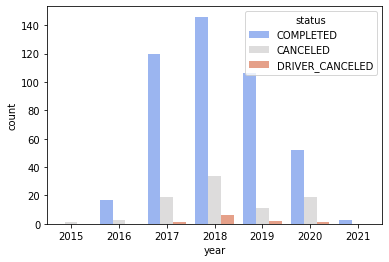

In [ ]:
print('Total trips: ', rides.status.count())
print(round(rides.status.value_counts()/rides.status.size*100,1))
sns.countplot(data=rides, x='year', order=['2015','2016','2017','2018','2019','2020','2021'], hue='status', palette='coolwarm');

###**Where most of the dropoffs ocurred?**

The following heatmap dynamically shows the most frequented areas throughout different hues and intensities. This could be a valuable information for Uber to adjust prices and optimize demand in certain regions, also combining time space data to track users behaviours.

In [ ]:
import folium
from folium import plugins

coord=[]
for lat,lng in zip(completed_rides.dropoff_lat.values,completed_rides.dropoff_lng.values):
  coord.append([lat,lng])

map = folium.Map(
    location=[-23.5489,-46.6388],
    tiles='Stamen Terrain',
    zoom_start=7,
    width='80%', 
    height='50%',
    control_scale=True)

map.add_child(plugins.HeatMap(coord))
        
map

###**What product type is usually chosen?**

**UberX** is far the prefered product type with a frequency of **90.3%**. So I could say I am the type of user which usually looks for **affordable prices**.

       Total Rides     %
UberX          401  90.3
Pool            39   8.8
Black            4   0.9


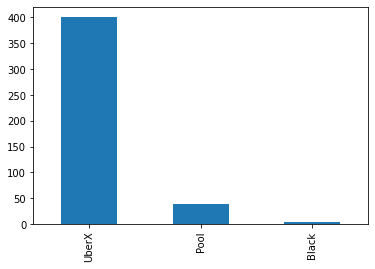

In [ ]:

pt_rides = pd.Series(completed_rides.product_type.value_counts().sort_index(ascending=False))

df = pd.DataFrame(pt_rides)

df['%'] = (completed_rides.product_type.value_counts().sort_index(ascending=False)/completed_rides.product_type.size*100).round(1)

df.rename(columns={'product_type':'Total Rides'}, inplace=True)
print(df)

completed_rides['product_type'].value_counts().plot(kind='bar');

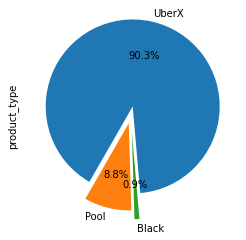

In [ ]:
completed_rides['product_type'].value_counts().plot(kind='pie',autopct='%1.1f%%',startangle=275,explode = [0.1,0.1,0.2]);

###**How much is the average fare and how much is payed by km traveled?**
Considering all trips, the average amount spent by trip is **19.2 BRL**, ridding in approx. **8.1 km**. So, if we do a quick simulation on **how much I would spend in a year** to do daily round trips we would have: ```365 days * 2 trips * 19.2 BRL/fare = 14,016 BRL/year```

In [ ]:
print('Avg. fare:', round(completed_rides.fare_amount.mean(),1),'BRL')
print('Avg. distance:',round(completed_rides.distance_km.mean(),1),'km')
print('Avg. fare/km:',round(completed_rides.fare_amount.sum()/completed_rides.distance_km.sum(),1),'BRL/km')
print('Avg. time spent on trips:',round(completed_rides.trip_duration.mean(),1),'minutes')
print('')
print('Total fare amount:', round(completed_rides.fare_amount.sum(),1),'BRL')
print('Total distance:',round(completed_rides.distance_km.sum(),1),'km')
print('Total time spent on trips:',round(completed_rides.trip_duration.sum()/60,1),'hours')

Avg. fare: 19.2 BRL
Avg. distance: 8.1 km
Avg. fare/km: 2.4 BRL/km
Avg. time spent on trips: 21.4 minutes

Total fare amount: 8532.8 BRL
Total distance: 3575.0 km
Total time spent on trips: 158.4 hours


###**Which weekdays have the highest average fares?**
According to the chart below, we can see that **Fridays** and **Sundays** were (in average) the **most expensive weekdays**, however we clearly noticed that **Sunday has the higher price elasticity**, described by black line. This interesting fact, could led us to infer that users look for **more convenience on Sundays**, as well as be the day with **higher profitability for Uber and its drivers**.

In [ ]:
table= completed_rides.pivot_table(values='amount_km',columns='weekday',aggfunc='mean', index='year').round(1)
column_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
table = table.reindex(column_order, axis=1)
table

weekday,Mon,Tue,Wed,Thu,Fri,Sat,Sun
year,,,,,,,
2016,NaN,NaN,2.8,2.4,NaN,2.1,2.9
2017,3.2,2.7,2.8,3.1,3.7,3.3,3.1
2018,3.4,2.6,3.4,2.7,2.9,3.2,5.1
2019,2.8,2.7,2.6,3.5,3.8,2.6,2.8
2020,2.8,2.4,2.7,2.7,3.0,3.2,2.8
2021,NaN,NaN,3.1,NaN,NaN,NaN,3.6


###**Which was the longest/shortest and more expensive/cheaper ride?**


The table below show records with the **longest (31.77 km)** and **shortest rides (0.24 km)**. 

In [ ]:
rides_distance = completed_rides[completed_rides.distance_km==completed_rides.distance_km.max()]
rides_distance = rides_distance.append(completed_rides[completed_rides.distance_km==completed_rides.distance_km.min()])
rides_distance

,city,product_type,status,request_time,begin_time,begin_lat,begin_lng,dropoff_time,dropoff_lat,dropoff_lng,distance_miles,fare_amount,year,month,weekday,time,distance_km,amount_km,request_lead_time,trip_duration
3,458,UberX,COMPLETED,2020-12-11 23:16:33,2020-12-11 23:27:32,-23.559410,-46.666435,2020-12-12 00:32:47,-23.425755,-46.481190,19.74,58.77,2020,Dec,Fri,23:16,31.77,1.85,11.0,65.2
305,458,UberX,COMPLETED,2018-04-15 23:18:40,2018-04-15 23:27:42,-23.502636,-46.624952,2018-04-15 23:34:17,-23.503310,-46.636808,0.15,11.27,2018,Apr,Sun,23:18,0.24,46.96,9.0,6.6


Analysing amount paid by km ridden we have: **expensive (46.96 BRL/km)** and **cheaper (0 BRL/km)**. Cheaper trip certainly refers to a free ride, while the expensive cost 46.96 BRL. This effect is basicaly driven by **fixed minimum fare in high demand periods**, since the total distance was only 0.24km.

In [ ]:
rides_amount_km = completed_rides[completed_rides.amount_km==completed_rides.amount_km.max()]
rides_amount_km = rides_amount_km.append(completed_rides[completed_rides.amount_km==completed_rides.amount_km.min()])
rides_amount_km

,city,product_type,status,request_time,begin_time,begin_lat,begin_lng,dropoff_time,dropoff_lat,dropoff_lng,distance_miles,fare_amount,year,month,weekday,time,distance_km,amount_km,request_lead_time,trip_duration
305,458,UberX,COMPLETED,2018-04-15 23:18:40,2018-04-15 23:27:42,-23.502636,-46.624952,2018-04-15 23:34:17,-23.503310,-46.636808,0.15,11.27,2018,Apr,Sun,23:18,0.24,46.96,9.0,6.6
87,458,UberX,COMPLETED,2019-11-30 03:34:56,2019-11-30 03:40:37,-23.591813,-46.690720,2019-11-30 03:53:24,-23.559366,-46.666489,3.54,0.00,2019,Nov,Sat,03:34,5.70,0.00,5.7,12.8


###**What is the average lead time before begining a trip?**

It takes **approximately 5 minutes** to start trips, after they are requested.

In [ ]:
print(round(completed_rides.request_lead_time.mean(),1),'minutes')

4.9 minutes


##**Conclusion**



So, in this we have preprocessed the dataset, visulized the dataset and made required EDA for the given dataset.